<a href="https://colab.research.google.com/github/istiaksaif/CSE445_BigMart_Sales_Prediction/blob/main/MLProject(BigMart).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

Data Analysis

In [ ]:
#loading dataset from csvfile
bigmart_data = pd.read_csv('/content/Train.csv')

In [ ]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#number of Features and points
bigmart_data.shape


(8523, 12)

In [ ]:
#info about data
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features


*   Item_Identifier
*   Item_Weight
*   Item_Fat_Content
*   Item_Visibility
*   Item_Type
*   Item_MRP
*   Outlet_Identifier
*   Outlet_Establishment_Year
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type
*   Item_Outlet_Sales

#missing values in Item_Weight 0 cause after inplace by avarage value agian run missing values cell

In [ ]:
#missing values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Average value of item_weight
Item_Weight_avg = bigmart_data['Item_Weight'].mean()
Item_Weight_avg

12.857645184136409

In [ ]:
#missing values in item_weight inpalce by average value
bigmart_data['Item_Weight'].fillna(Item_Weight_avg, inplace = True)

In [ ]:
#check missing values item_weight after inplace by average value
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Replace the missing values in outlet_size

outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [ ]:
missing_values_outlet_size = bigmart_data['Outlet_Size'].isnull()
print(missing_values_outlet_size)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
#missing values in outlet_size repalce
bigmart_data.loc[missing_values_outlet_size,'Outlet_Size'] = bigmart_data.loc[missing_values_outlet_size,'Outlet_Type'].apply(lambda x: outlet_size)

In [ ]:
#check missing values after replace outlet_size
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [ ]:
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Numerical features

sns.set()

<Figure size 432x432 with 0 Axes>

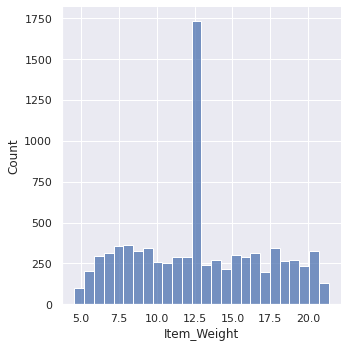

In [ ]:
#item_weight_distribution
plt.figure(figsize=(6,6))
sns.displot(bigmart_data['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

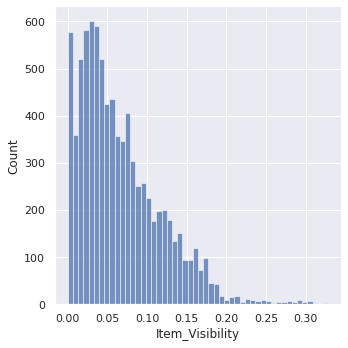

In [ ]:
 #Item_Visibility_distribution
plt.figure(figsize=(6,6))
sns.displot(bigmart_data['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

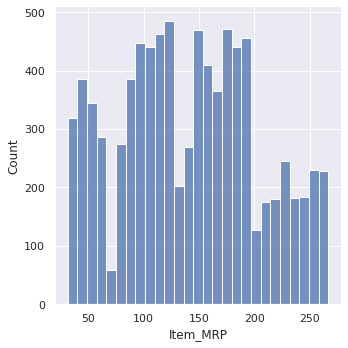

In [ ]:
#Item_MRP_distribution
plt.figure(figsize=(6,6))
sns.displot(bigmart_data['Item_MRP'])
plt.show()

<Figure size 720x432 with 0 Axes>

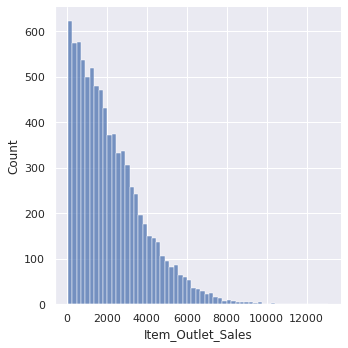

In [ ]:
#Item_Outlet_Sales_distribution
plt.figure(figsize=(10,6))
sns.displot(bigmart_data['Item_Outlet_Sales'])
plt.show()

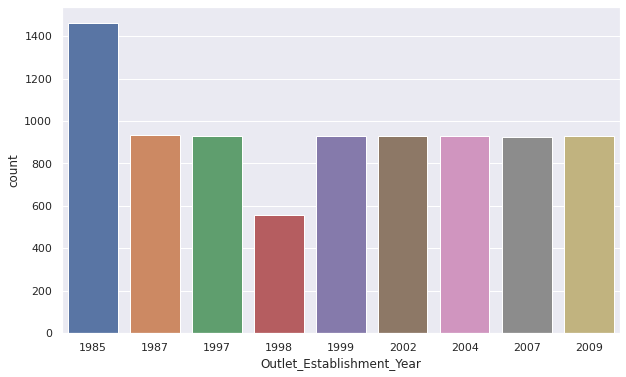

In [ ]:
#Outlet_Establishment_Year_distribution
plt.figure(figsize=(10,6))
sns.countplot(x ='Outlet_Establishment_Year', data = bigmart_data)
plt.show()

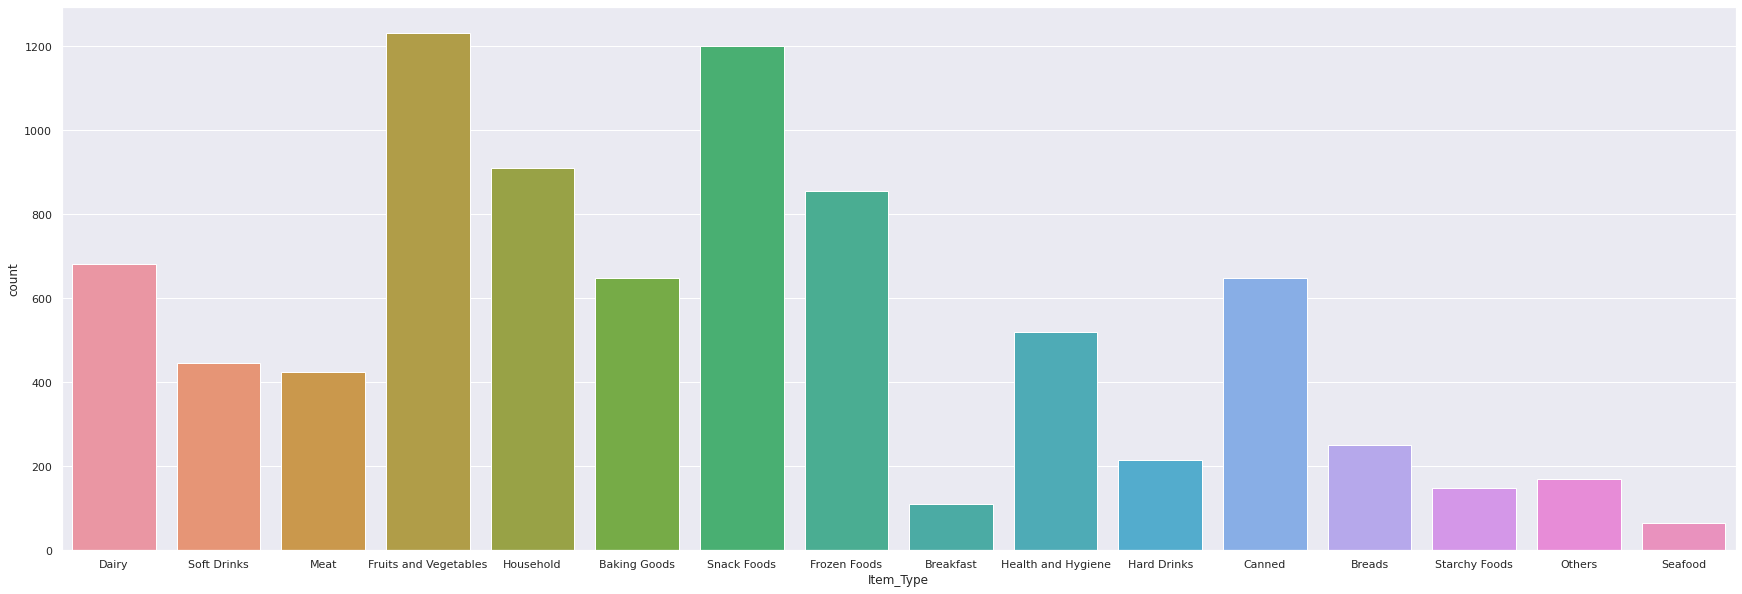

In [ ]:
#Item_Type_distribution
plt.figure(figsize=(30,10))
sns.countplot(x ='Item_Type', data = bigmart_data)
plt.show()

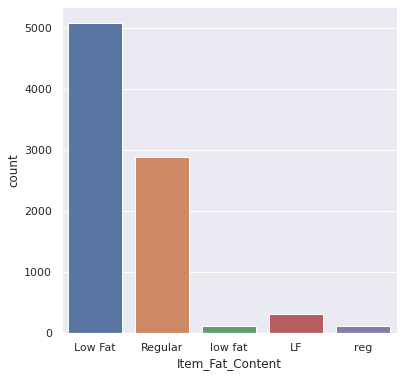

In [ ]:
#Item_Fat_Content_column
plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content', data = bigmart_data)
plt.show()

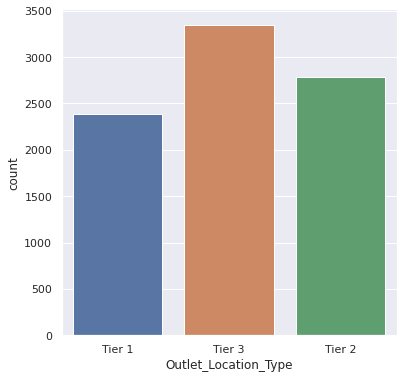

In [ ]:
#Outlet_Location_Type_column
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Location_Type', data = bigmart_data)
plt.show()

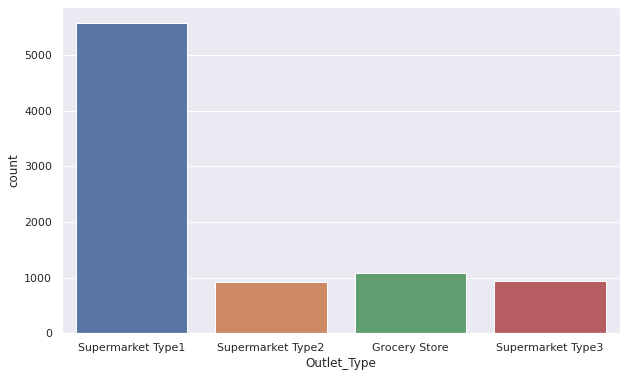

In [ ]:
#Outlet_Type_column
plt.figure(figsize=(10,6))
sns.countplot(x ='Outlet_Type', data = bigmart_data)
plt.show()

In [ ]:
#Outlet_Size 
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1]:
#Outlet_Size_column
plt.figure(figsize=(10,6))
sns.countplot(x ='Outlet_Size', data = bigmart_data)
plt.show()

NameError: ignored